In [4]:
%matplotlib inline

# import packages
import numpy as np
import time
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cm
from matplotlib import gridspec


In [5]:
# define plot properties
from cycler import cycler
import matplotlib.cm as cm

from matplotlib import rcParams
from matplotlib import rc
from mpl_toolkits.axes_grid1 import make_axes_locatable

import matplotlib.animation as animation

def rgb(r,g,b):
    return (float(r)/256.,float(g)/256.,float(b)/256.)

cb2 = [rgb(31,120,180), rgb(255,127,0), rgb(51,160,44), rgb(227,26,28), \
       rgb(166,206,227), rgb(253,191,111), rgb(178,223,138), rgb(251,154,153)]

rcParams['figure.figsize'] = (9,7.5)
rcParams['figure.dpi'] = 300

rcParams['lines.linewidth'] = 1

rcParams['axes.prop_cycle'] = cycler('color', cb2)
rcParams['axes.facecolor'] = 'white'
rcParams['axes.grid'] = False

rcParams['patch.facecolor'] = cb2[0]
rcParams['patch.edgecolor'] = 'white'

#rcParams['font.family'] = 'Bitstream Vera Sans' 
rcParams['font.size'] = 23
#rcParams['font.weight'] = 300


> Read data.


In [6]:
# restore data
temp = np.load("../Zeldovich_Approximation.npz")
sim_z0 = temp["sim_z0"]
sim_z50 = temp["sim_z50"]


> Inspect data

Text(0, 0.5, 'z = 0')

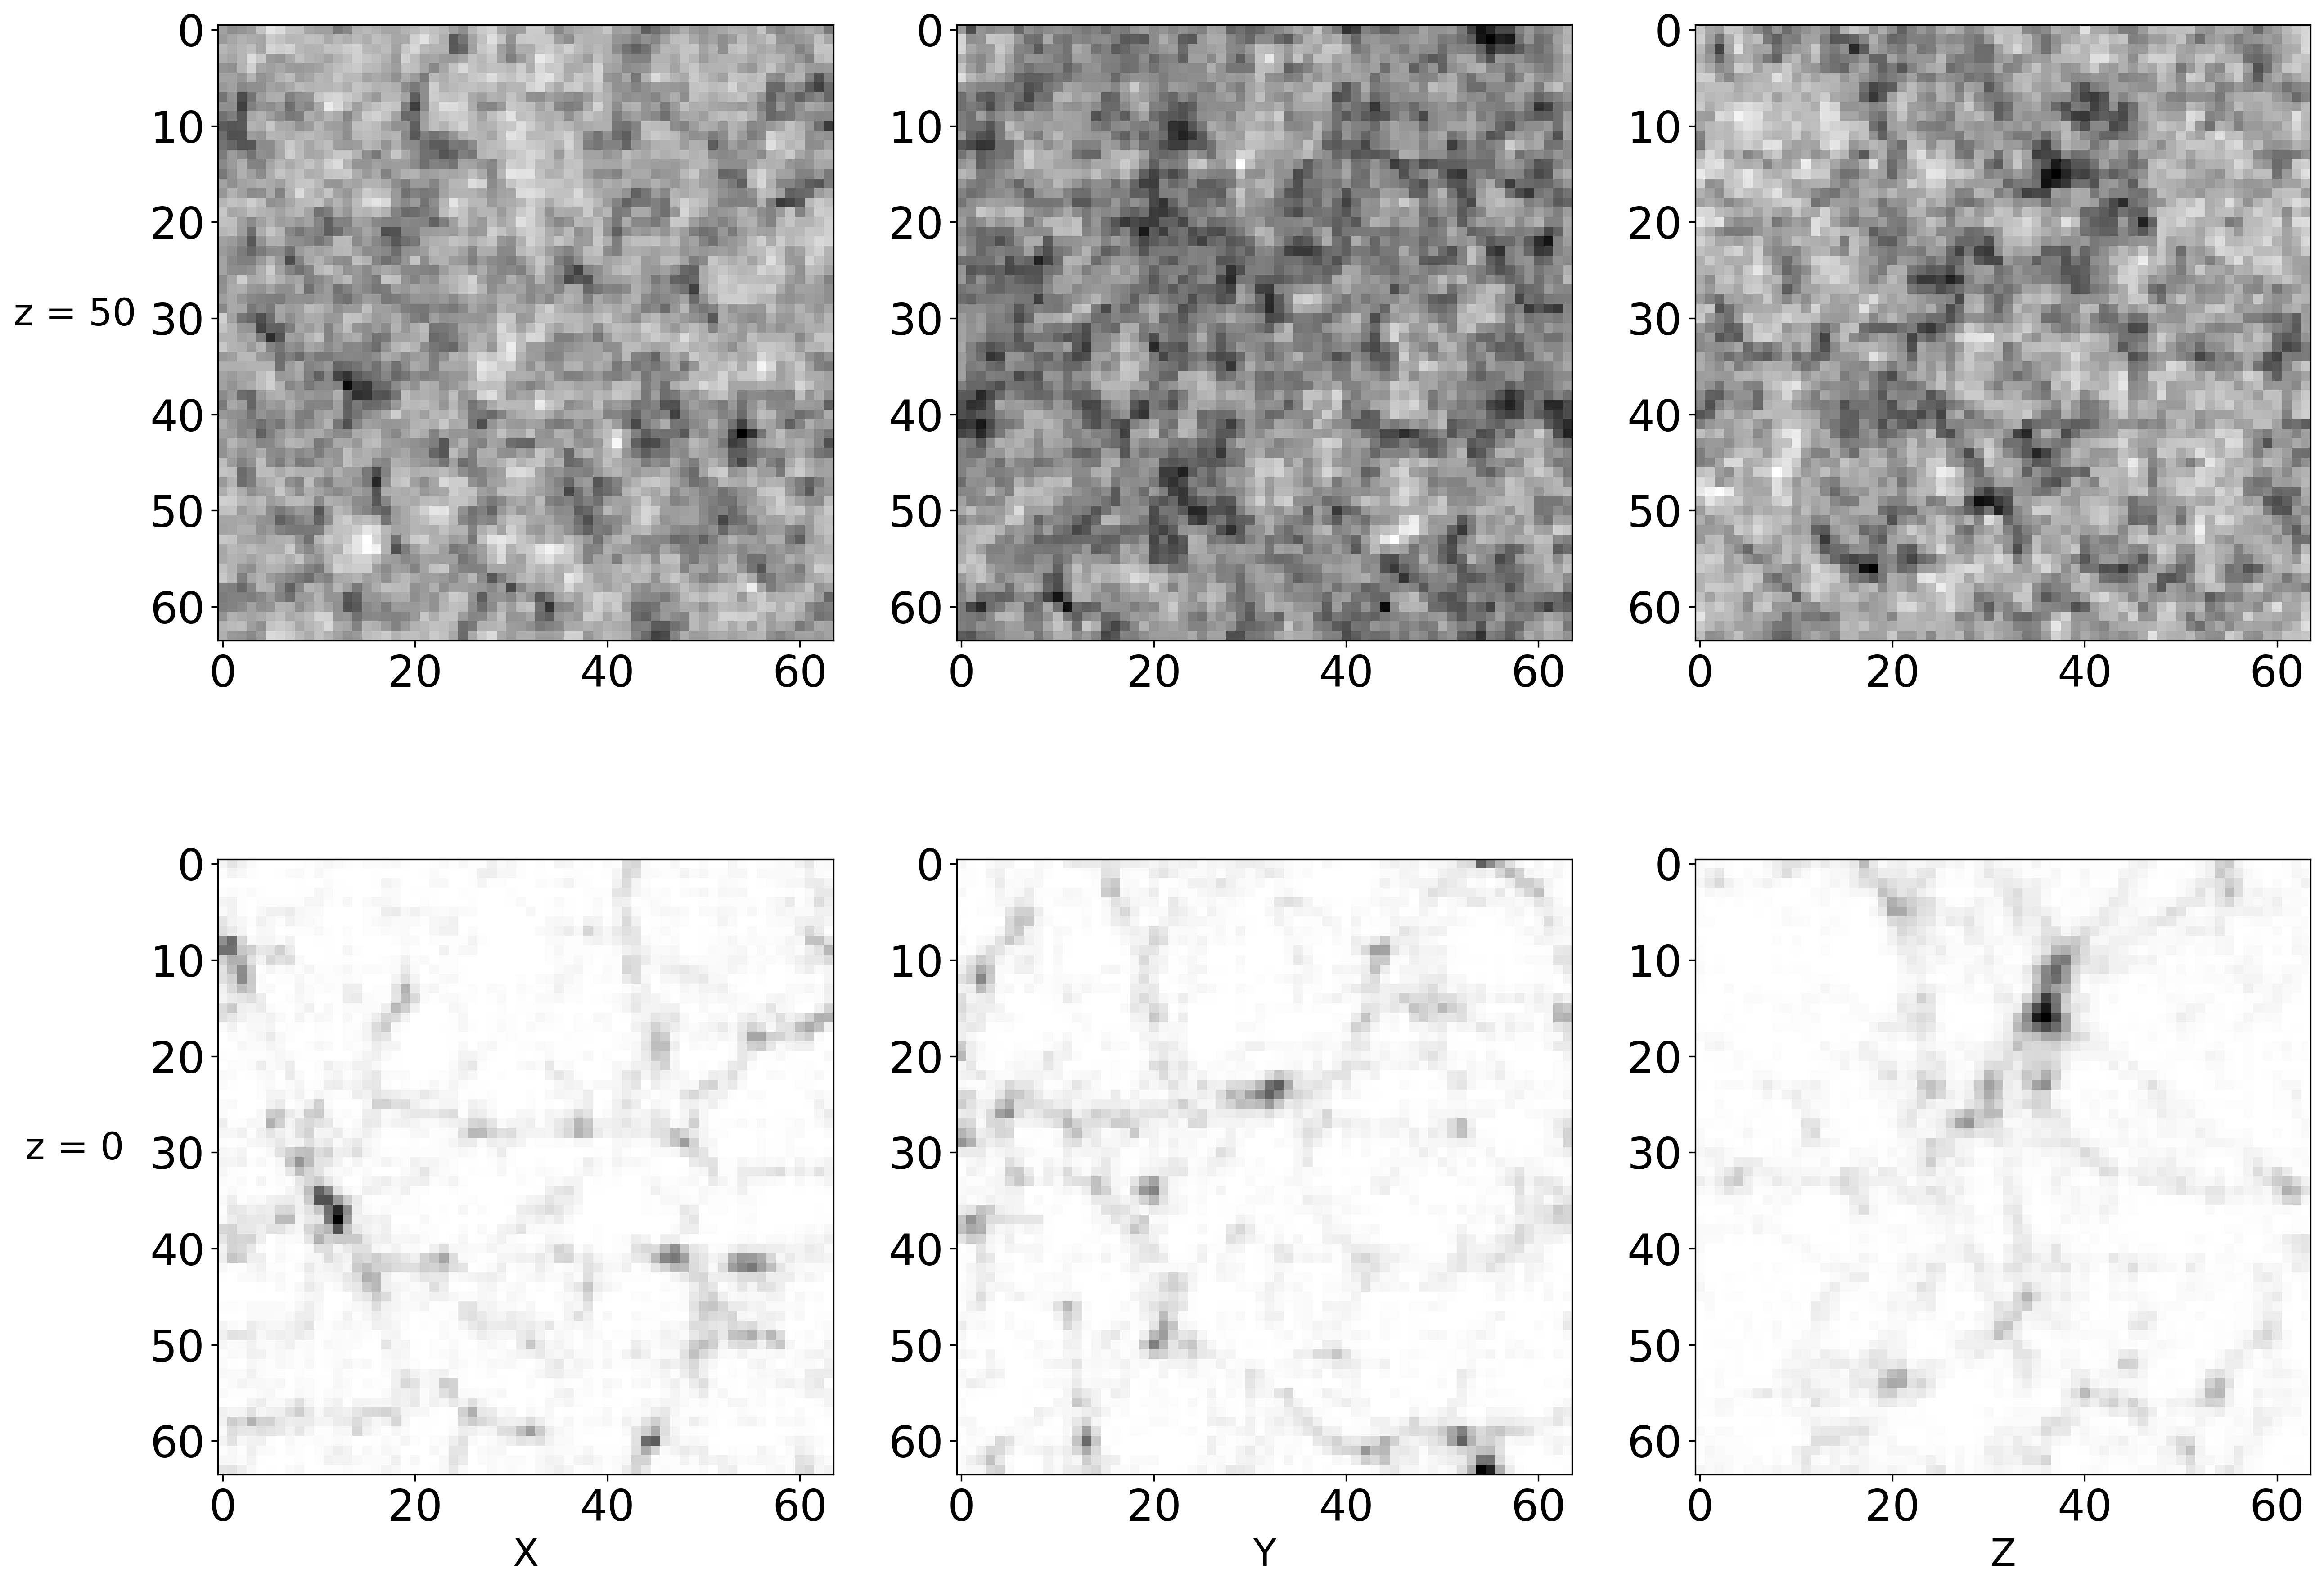

In [10]:
fig, ax = plt.subplots(2, 3, figsize = (20,  15))
ax[0, 0].imshow(sim_z50[simID, slice, :, :], cmap='gray_r')
ax[0, 1].imshow(sim_z50[simID, :, slice, :], cmap='gray_r')
ax[0, 2].imshow(sim_z50[simID, :, :, slice], cmap='gray_r')

ax[1, 0].imshow(sim_z0[simID, slice, :, :], cmap='gray_r')
ax[1, 1].imshow(sim_z0[simID, :, slice, :], cmap='gray_r')
ax[1, 2].imshow(sim_z0[simID, :, :, slice], cmap='gray_r')

ax[1, 0].set_xlabel('X',fontsize=20)
ax[1, 1].set_xlabel('Y', fontsize=20)
ax[1, 2].set_xlabel('Z', fontsize=20)

ax[0, 0].set_ylabel('z = 50', rotation=0, fontsize=20, labelpad=40)
ax[1, 0].set_ylabel('z = 0', rotation=0, fontsize=20, labelpad=40)
 

> Inspect the data.

(array([643897., 569774., 507607., 455000., 407431., 368719., 332195.,
        303123., 275798., 252155., 230562., 211973., 194759., 180108.,
        165847., 154403., 142427., 132431., 123382., 114457., 106554.,
         99677.,  93389.,  86898.,  81340.,  76733.,  71545.,  66824.,
         63357.,  59405.,  55848.,  52951.,  49854.,  46709.,  44804.,
         42343.,  40303.,  37748.,  35862.,  33839.,  32190.,  30577.,
         29072.,  27701.,  25997.,  24888.,  23716.,  22177.,  21638.,
         20488.,  19428.,  18463.,  17509.,  16880.,  15992.,  15301.,
         14706.,  14060.,  13339.,  12770.,  12507.,  11857.,  11345.,
         10659.,  10349.,   9902.,   9626.,   9140.,   8690.,   8157.,
          8250.,   7701.,   7293.,   7204.,   6741.,   6515.,   6281.,
          6105.,   5778.,   5632.,   5494.,   5136.,   5009.,   4769.,
          4633.,   4497.,   4184.,   4020.,   3931.,   3750.,   3587.,
          3490.,   3459.,   3223.,   3154.,   3093.,   2948.,   2984.,
      

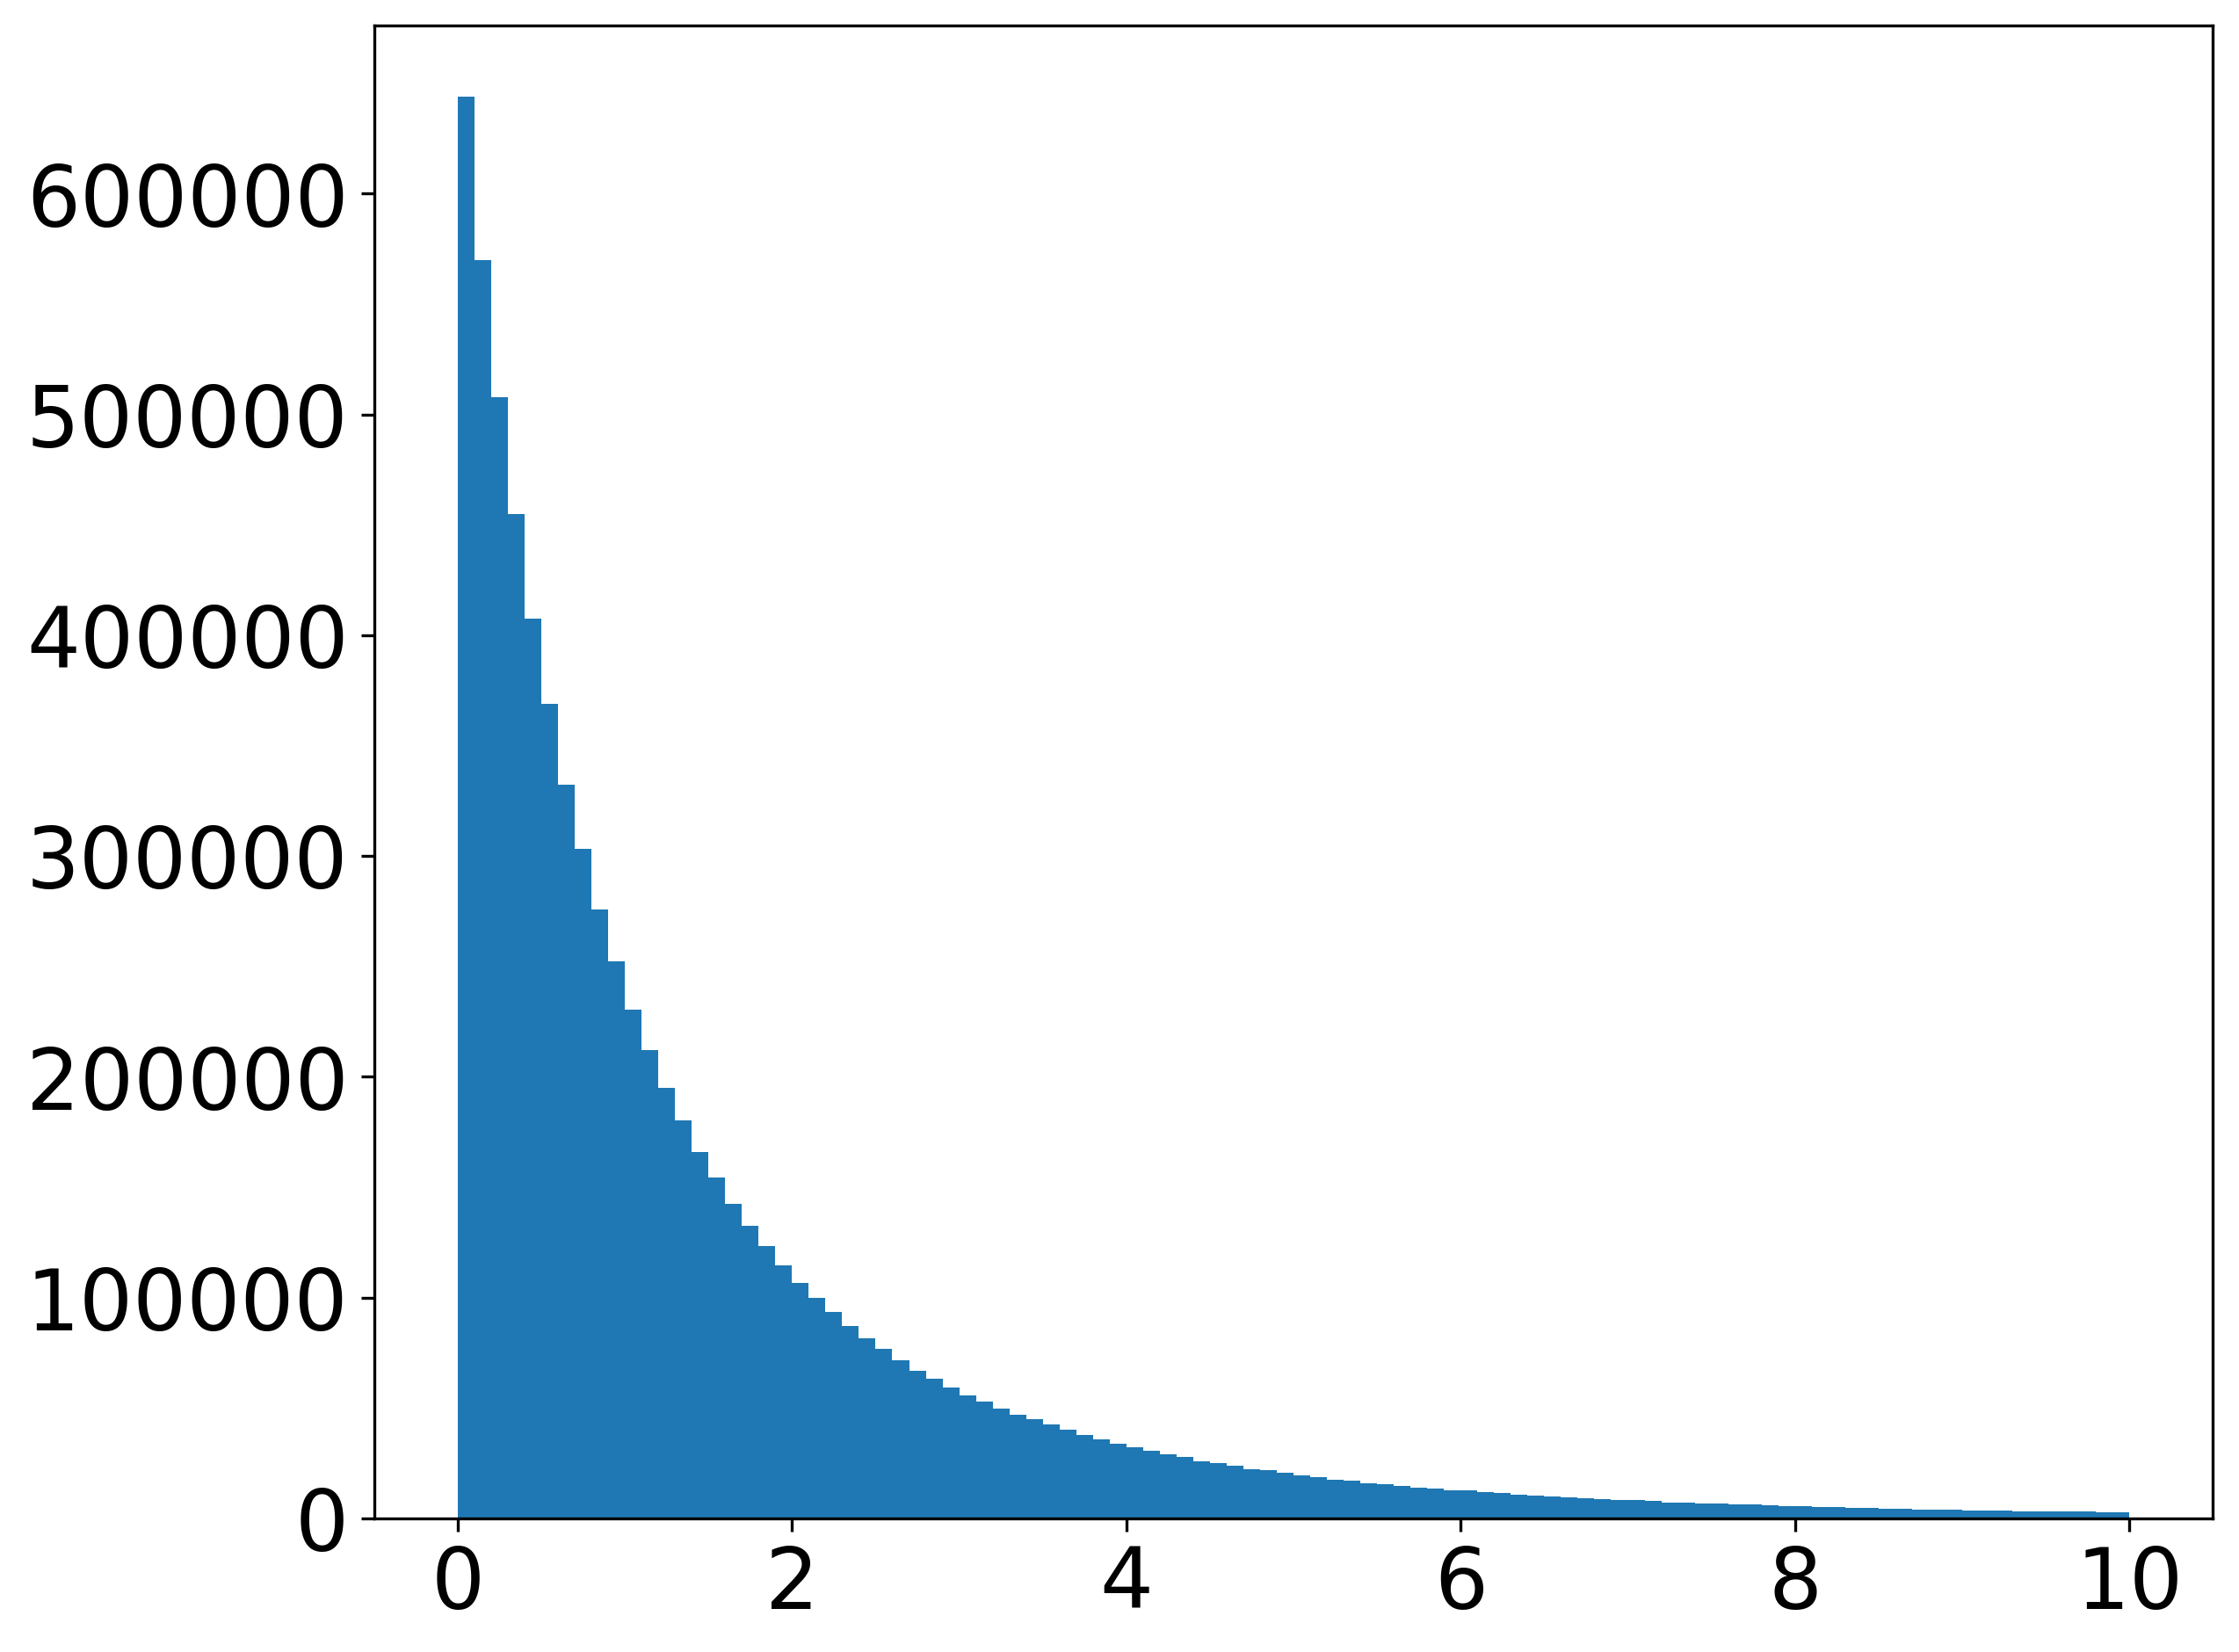

In [24]:
plt.hist(sim_z0.ravel(), range=[0,10], bins=100)

> Inspect scattering coefficients.

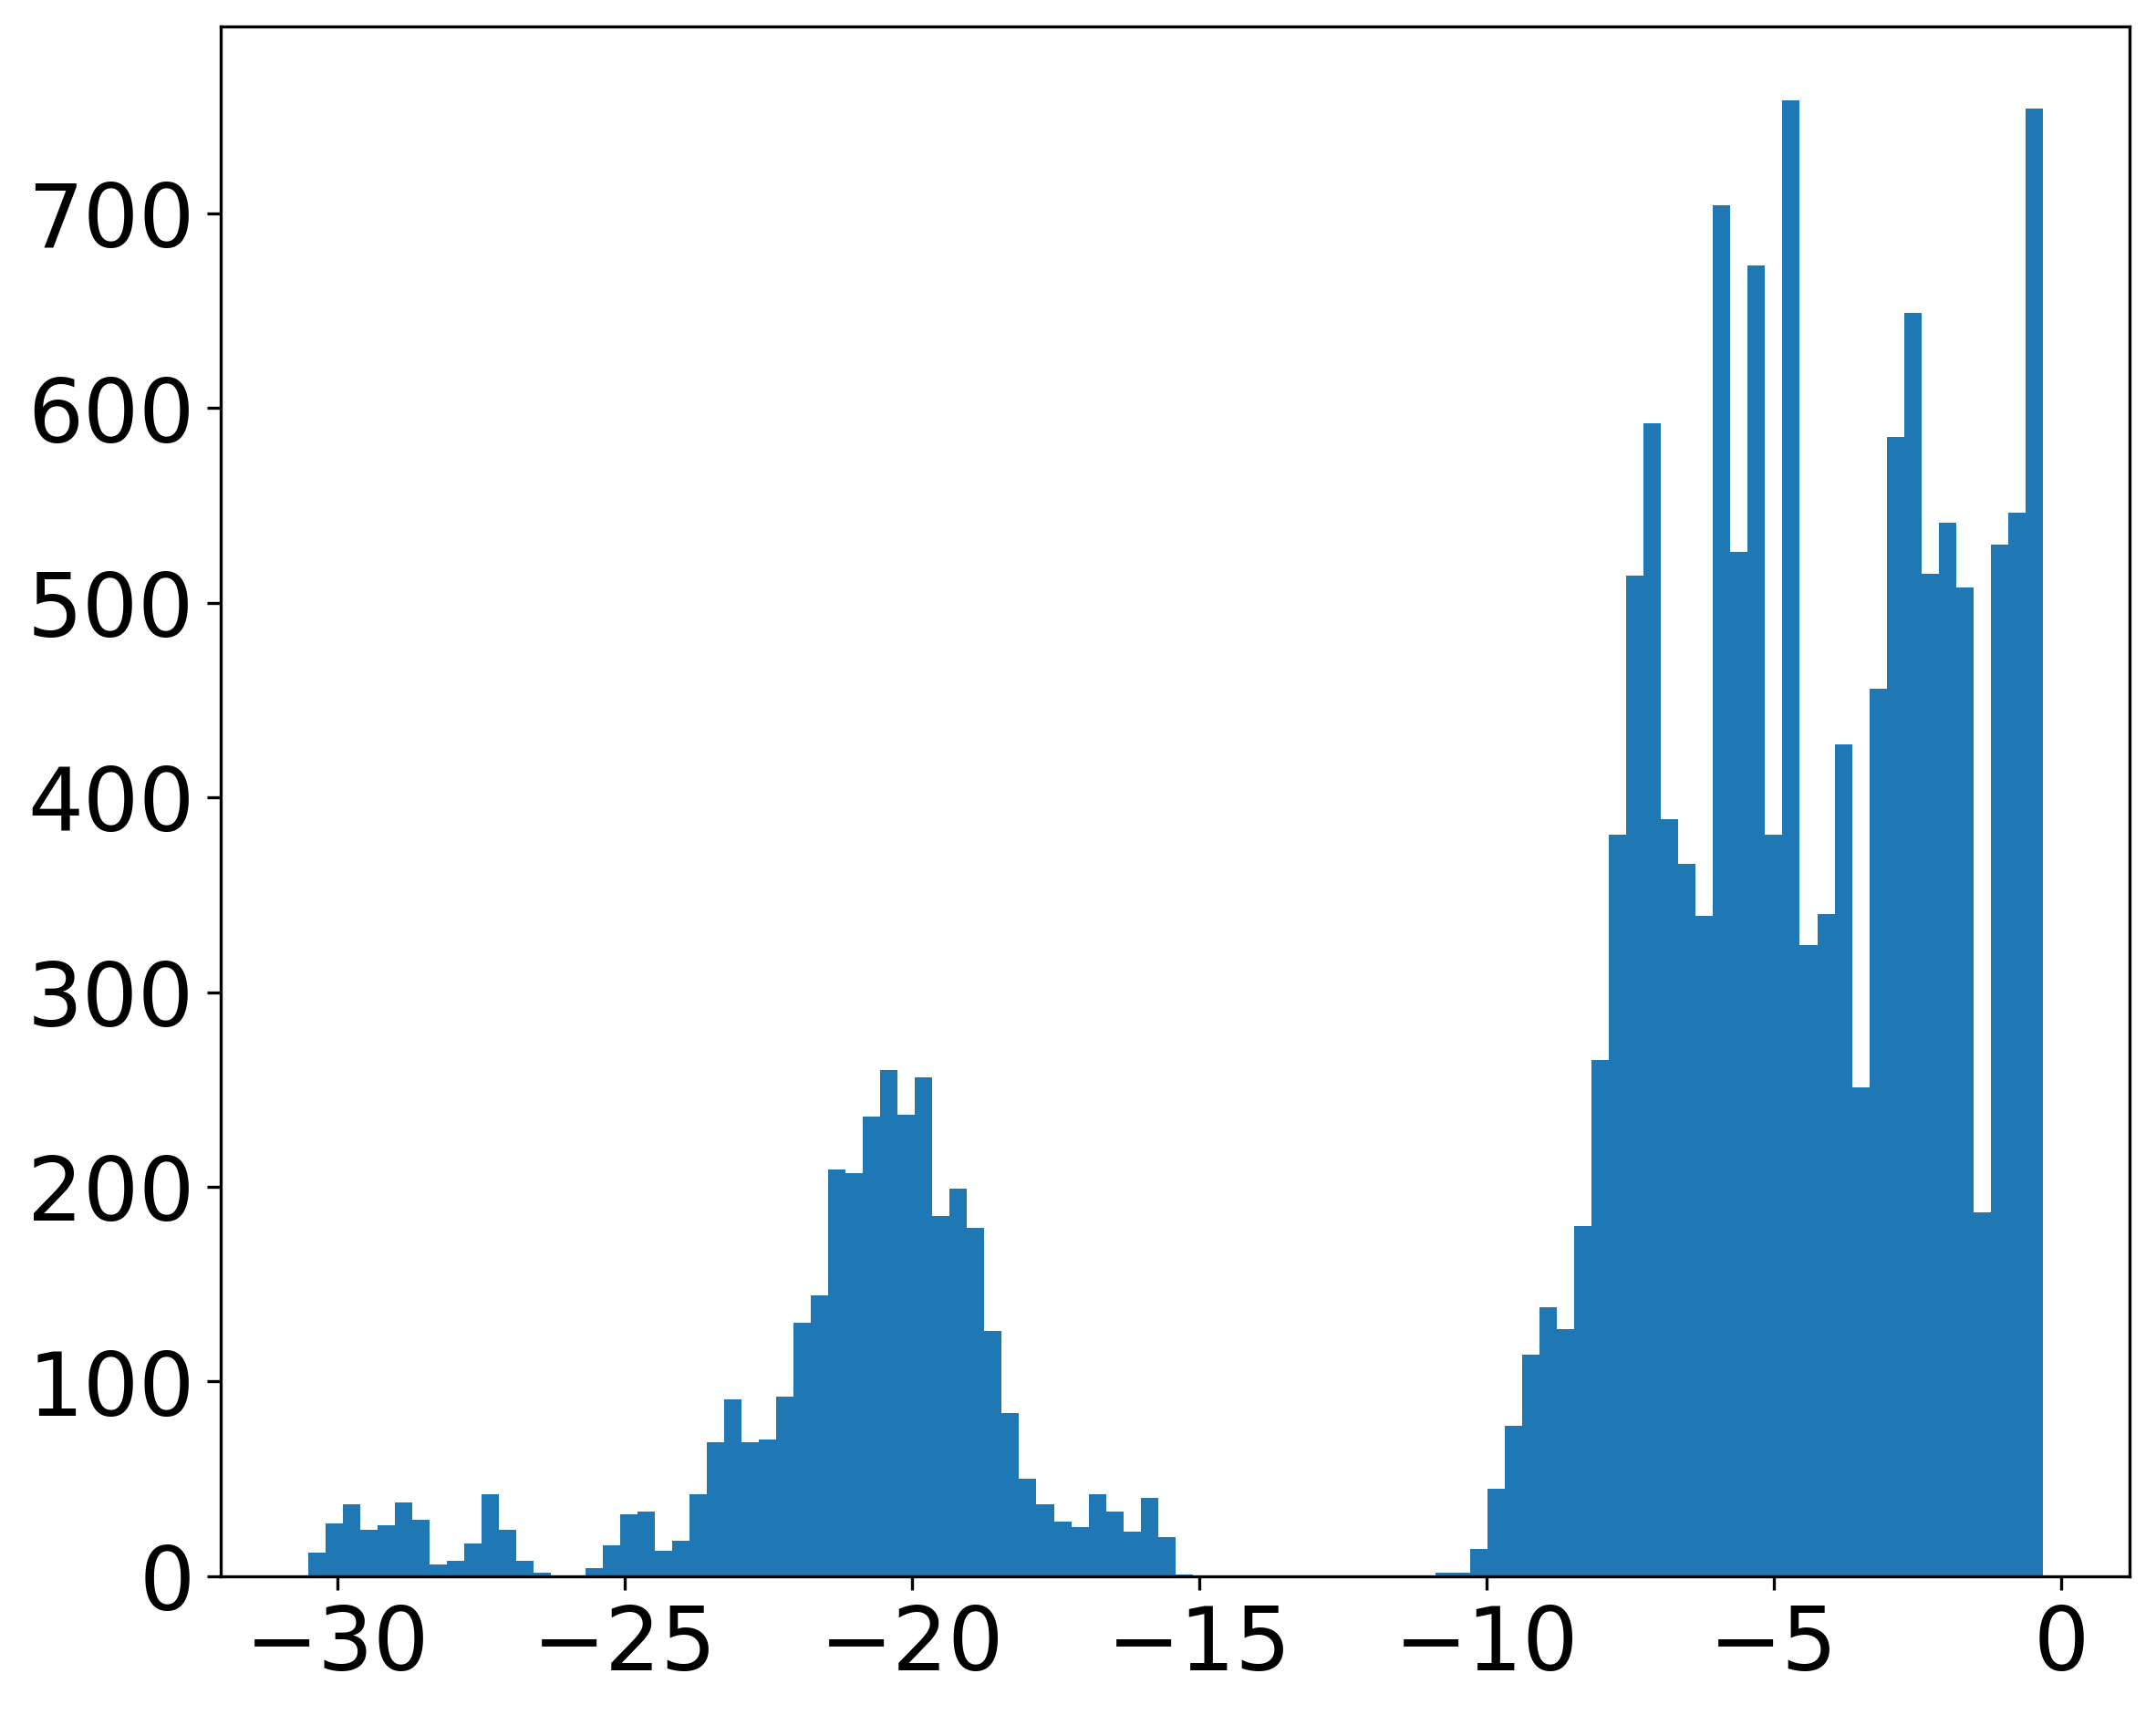

In [18]:
scatter_coeff = np.load("../scatter_coeff_3D_max_order=2.npy")
plt.hist(np.log(scatter_coeff).ravel(), bins=100);